# 0 - Information

To select a different dataset, you just have to go in section 2 : Data and change the variable named "dataset" to set it to A, B or C.
Then, you can run the complete get to get results.

# 1 - Packages


In [51]:
%matplotlib inline

# Mathematical packages
import numpy as np

# Graphics packages
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 2 - Data

In this section, we define the function "read_data". Ths function allows to load the different datasets.

In [52]:
def read_data(file_name):
    """This function extracts the data contained in the file 'file_name'."""
    
    # Initialisation of the matrices x_m and y_m
    x_m = []
    y_m = []
    
    # Read file
    with open(file_name, 'r') as file:
        for line in file:
            line = line.rstrip()
            data = line.split("\t")
            
            # Convert the string as float
            data = list(map(float, data))
            
            # Instantiate
            x_m.append([data[0], data[1]])
            y_m.append([data[2]])
            
    # Return result
    y_m = np.array(y_m).reshape(-1)
    x_m = np.array(x_m)
    
    # Center the variables
    x_m = (x_m - x_m.mean(axis=0)) / x_m.std(axis=0)
    
    return x_m, y_m

In [53]:
# Extraction of some data
dataset = "A"
path = "./Data/"

# Load the data
x_m, y_m = read_data(path + "classification" + dataset + ".train")
x_m_test, y_m_test = read_data(path + "classification" + dataset + ".test")

# Path towards the saving folder
saving_folder = "./Images/" + dataset + "/"

# 3 - Graphic function

In this section, we define all the functions required for displaying the results.

In [54]:
def scatter(x_m, y_m):
    """This function displays the points (x_i) contains in x_m.
       It also adapted the color of the point according to y_i cotains in y_m"""

    sns.scatterplot(x=x_m[:,0], y=x_m[:,1], hue=y_m)

In [55]:
def line(x_m, a, b):
    """This function displays the line whose equation is y = a * x + b."""
    
    # x_pre
    x_pre = np.linspace(x_m[:, 0].min(), x_m[:, 0].max(), 1000)
    
    # y_pre
    y_pre = a * x_pre + b
    
    # Display the result line
    plt.plot(x_pre, y_pre, color='r')

In [56]:
def figure(x_m, y_m, a, b,name):
    """This function allows to display on the same points and the decision line predicted"""
    
    # Print the coefficients
    print("Coefficients of the line of decision")
    print("a: ", a)
    print("b: ", b)
    print("")
    
    # Parameters of the figure
    fig, ax = plt.subplots(figsize=(8,8))
    plt.grid(True)
    
    # Set the axes
    ax.set_xlim(x_m[:,0].min() - 0.5, x_m[:,0].max() + 0.5)
    ax.set_ylim(x_m[:,1].min() - 0.5, x_m[:,1].max() + 0.5)
    
    # Display the data
    scatter(x_m, y_m)
    line(x_m, a, b)
    
    # Legend of the axes
    plt.xlabel("x_1")
    plt.ylabel("x_2")
    
    # Save the fig
    plt.savefig(name, bbox_inches='tight', pad_inches=0.0)
    
    # Display the figure
    plt.show()

In [57]:
def score(x_m, y_m, a, b):
    """This function computes the score of"""
    
    # Parameters
    n = len(y_m)
    
    # Initialisation
    score = 0
    
    for i in range(n):
        if (a * x_m[i,0] + b < x_m[i,1]):
            score += (1 == y_m[i])
        else:
            score += (0 == y_m[i])
            
    # Return result
    return max(1 - score/n, score/n)

# 4 - LDA

In this section, we define the function "lda". This function allows to compute a result line of separation with a LDA model.

In [58]:
def lda(x_m, y_m):
    """This function computes the decision between the y_m"""
    
    # Parameters
    n = len(y_m)
    n_y = y_m.sum() 
    
    # Computation of the estimators
    # Pi
    pi = n_y / n
    
    # Mu
    mu_1_0 = (y_m * x_m[:, 0]).sum() / n_y
    mu_1_1 = (y_m * x_m[:, 1]).sum() / n_y
    mu_1 = np.array([mu_1_0, mu_1_1])
    
    mu_0_0 = ((1 - y_m) * x_m[:, 0]).sum() / (n - n_y)
    mu_0_1 = ((1 - y_m) * x_m[:, 1]).sum() / (n - n_y)
    mu_0 = np.array([mu_0_0, mu_0_1])
    
    # Sigma
    sigma = np.zeros((2, 2))
    for i in range(n):
        
        x_i = x_m[i, :]
        sigma += 1/n * y_m[i] * np.dot((x_i - mu_1).reshape(2, 1), 
                                       (x_i - mu_1).reshape(1, 2))
        
        sigma += 1/n * (1 - y_m[i]) * np.dot((x_i - mu_0).reshape(2, 1), 
                                             (x_i - mu_0).reshape(1, 2))
        
    
    # Coefs
    c = np.dot(np.linalg.inv(sigma), mu_0 - mu_1)
    d = -1/2 * np.dot(mu_0, np.dot(np.linalg.inv(sigma), mu_0))
    d += 1/2 * np.dot(mu_1, np.dot(np.linalg.inv(sigma), mu_1))
    d += np.log((1 - pi) / pi)
    
    a = -c[0] / c[1]
    b = -d / c[1]
    
    # Plot
    figure(x_m, y_m, a, b, saving_folder + "lda_" + dataset + ".eps")
    
    # Display results
    return (a, b)

Coefficients of the line of decision
a:  -1.902934597650817
b:  -0.3866825804099873



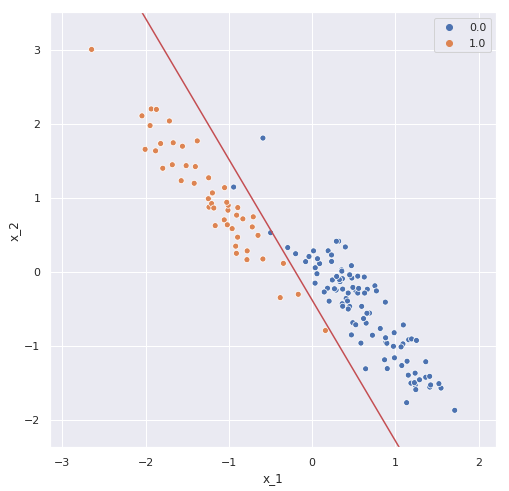

score entrainement :  0.9866666666666667
score test :  0.9826666666666667


In [59]:
# Display result
a, b = lda(x_m, y_m)

# Computation of the score
print("score entrainement : ",score(x_m, y_m, a, b))
print("score test : ", score(x_m_test, y_m_test, a, b))

Coefficients of the line of decision
a:  -1.902934597650817
b:  -0.3866825804099873



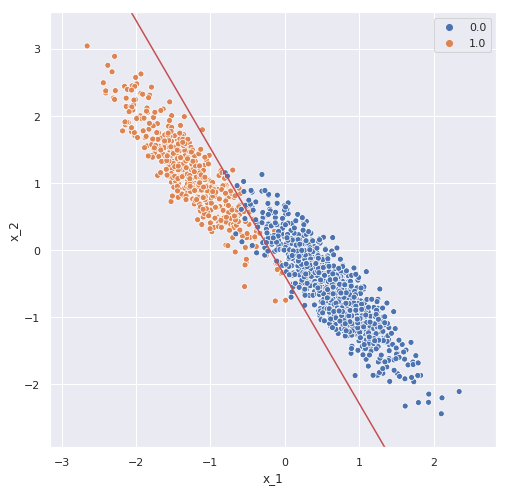

In [60]:
figure(x_m_test, y_m_test, a, b, saving_folder + "lda_test_" + dataset + ".eps")

# 5 - Logistic Regression

In this section, we define the function "Logistic". This function allows to compute the result separation line with a logistic regression model.

In [61]:
def sigmoid(w, x):
    """This function allows to compute the result of the sigmoid of the scalar product
       between x and w."""
    
    # Compute sigmoid
    result = 1 / (1 + np.exp(-np.dot(x, w)))
    
    # Return result
    return result

In [62]:
def gradient(x_m, y_m, w):
    """Compute the gradient of the logistic regression in x and w."""
    
    # Reshape
    y = np.tile(y_m.reshape((-1,1)), 3)
    
    # Compute of the gradient
    g = y * (1 - sigmoid(w, x_m)) * x_m - (1 - y) * sigmoid(w, x_m) * x_m
    g = g.sum(axis=0)
    
    # Reshape g
    g = g.reshape((-1,1))
    
    # Return result
    return g

In [63]:
def hessian(x_m, w):
    """Compute the hessian of the logistic regression in w and x."""
    
    # Parameters
    n, d = np.shape(x_m)
    
    # Initialisation
    h = np.zeros((d, d))
    
    for i in range(n):
        
        x_i = x_m[i, :]
                
        h -= sigmoid(w, x_i) * (1 - sigmoid(w, x_i)) * np.dot(x_i.reshape((-1,1)), 
                                                              x_i.reshape((1,-1)))
        
    # return result
    return h

In [64]:
def Newton(h, g, w):
    """Apply a Newton step on w."""
    
    # Update w
    w = w - np.dot(np.linalg.inv(h), g)
    
    # Return result
    return w

In [65]:
def logistic(x_m, y_m):
    """Compute the separation line of the y_m."""
    
    # Parameters
    n = len(y_m)
    
    # Add a constant
    const = np.ones((n,1))
    x_m = np.hstack((x_m, const))
    
    # Initialisation
    w_t_1 = np.ones((3, 1))
    w_t = np.zeros((3, 1))
    
    # Loop 
    diff = np.linalg.norm(w_t - w_t_1)
    
    while diff > 1:
        
        # g, h
        g = gradient(x_m, y_m, w_t)
        h = hessian(x_m, w_t) + np.eye(3) * 10e-5
        
        # Save w_t
        w_t_1 = w_t

        # Algorithm of Newton
        w_t = Newton(h, g, w_t)
        
        # Update of the diff
        diff = np.linalg.norm(w_t - w_t_1)
        
    # Coefs
    a = (-w_t[0] / w_t[1])[0]
    b = (-w_t[2] / w_t[1])[0]
               
    # Plot
    figure(x_m, y_m, a, b, saving_folder + "logistic_" + dataset + ".eps")
    
    # Return result
    return (a, b)

Coefficients of the line of decision
a:  -1.5529205903840981
b:  -0.34228156276375843



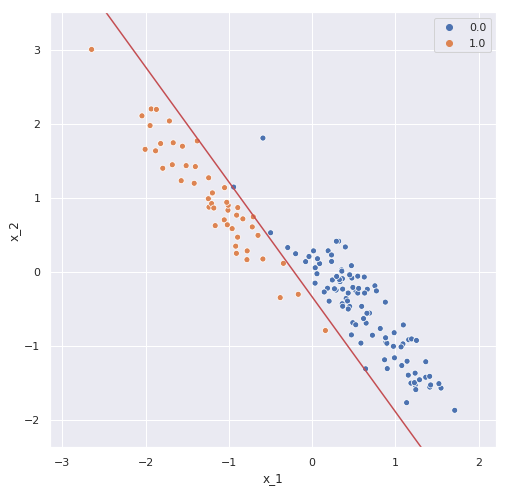

score entrainement :  1.0
score test :  0.9593333333333334


In [66]:
# Display result
a, b = logistic(x_m, y_m)

# Compute the score
print("score entrainement : ", score(x_m, y_m, a, b))
print("score test : ", score(x_m_test, y_m_test, a, b))

Coefficients of the line of decision
a:  -1.5529205903840981
b:  -0.34228156276375843



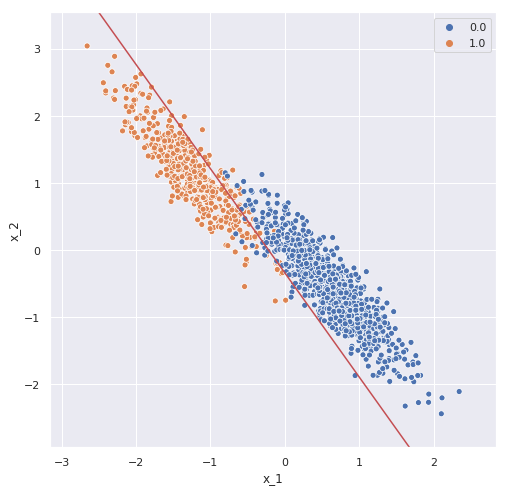

In [67]:
figure(x_m_test, y_m_test, a, b, saving_folder + "logistic_test_" + dataset + ".eps")

# 6 - Linear Regression

In this section,we are going to implement the linear regression and to display the computed decision line for this model.

In [68]:
def linearRegression(x_m, y_m):
    """This function computes the decision line between the y_m."""
    
    # Parameters
    n = len(y_m)
    
    # Add a constant
    const = np.ones((n,1))
    x_m_1 = np.hstack((x_m, const))
    
    # Computation of w
    xx = np.dot(np.transpose(x_m_1), x_m_1)
    w = np.linalg.inv(xx)
    w = np.dot(w, np.transpose(x_m_1))
    w = np.dot(w, y_m)
    
    # Reshape w
    w = w.reshape((-1, 1))
    
    # Computation of sigma
    sigma = (((y_m - np.dot(x_m_1, w)) ** 2).mean()) ** (1/2)
    
    # Coefs
    a = (-w[0] / w[1])[0]
    b = (-w[2][0] + 1 - (sigma**2 * np.log(2 / (np.pi * sigma**2)))**(1/2))/ w[1][0]
    
    # Plot
    figure(x_m, y_m, a, b, saving_folder + "LS_" + dataset + ".eps")
    
    # Return result
    return (a, b, w)

Coefficients of the line of decision
a:  -1.9029345976508059
b:  -0.5607533987107234



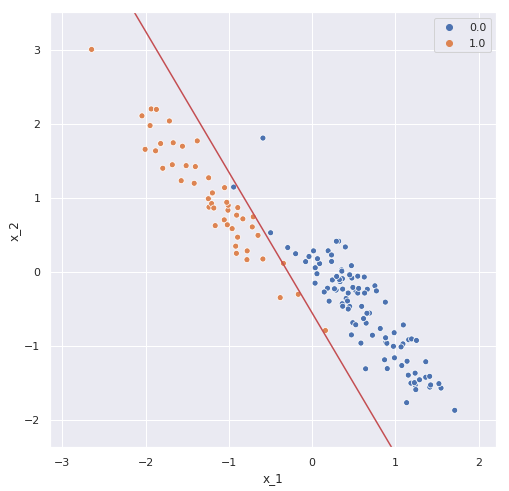

score entrainement :  0.98
score test :  0.9673333333333334


In [69]:
# Display Result
a, b, w = linearRegression(x_m, y_m)

# Display scores
print("score entrainement : ", score(x_m, y_m, a, b))
print("score test : ", score(x_m_test, y_m_test,a,b))

Coefficients of the line of decision
a:  -1.9029345976508059
b:  -0.5607533987107234



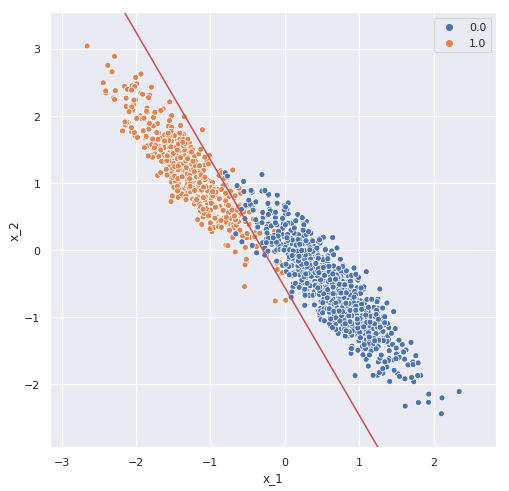

In [70]:
figure(x_m_test, y_m_test, a, b, saving_folder + "LS_test_" + dataset + ".eps")

# 7 - QDA 

In [71]:
def evalue(qua, lin, cst, x, y):
    return(cst + lin[0]*x + lin[1]*y + qua[0,0]*x*x + (qua[0,1]+qua[1,0])*x*y + qua[1,1]*y*y)

def score_qda(x_m, y_m, qua, lin, cst):
    """This function computes the score of the QDA model"""
    
    # Parameters
    n = len(y_m)
    
    # Initialisation
    score = 0
    
    for i in range(n):
        if evalue(qua, lin, cst, x_m[i,0], x_m[i,1]) < 0:
            score += 1==y_m[i]
        else:
            score += 0==y_m[i]
            
    # Return result
    return(score/n)

In [72]:
def figure_qda(x_m, y_m, qua, lin, cst, name, z=0):
    """This function allows to display on the points in R2 and the decision line."""
    
    # Parameters
    x0_min = min(x_m[:,0])
    x1_min = min(x_m[:,1])
    x0_max = max(x_m[:,0])
    x1_max = max(x_m[:,1])
    
    # Create a meshgrid
    delta = 0.025
    x0 = np.arange(x0_min, x0_max, delta)
    x1 = np.arange(x1_min, x1_max, delta)
    X0, X1 = np.meshgrid(x0, x1)
    
    # Parameters of the figure
    fig, ax = plt.subplots(figsize=(8,8))
    plt.grid(True)
    
    # Set the axes
    ax.set_xlim(x_m[:,0].min() - 0.5, x_m[:,0].max() + 0.5)
    ax.set_ylim(x_m[:,1].min() - 0.5, x_m[:,1].max() + 0.5)
    
    # Display the data
    scatter(x_m, y_m)
    plt.contour(X0, X1, cst + lin[0]*X0 + lin[1]*X1 + qua[0,0]*X0*X0 +\
                (qua[0,1] + qua[1,0])*X0*X1 + qua[1,1]*X1*X1, [z], colors='r')
    
    # Legend of the axes
    plt.xlabel("x_1")
    plt.ylabel("x_2")
       
    # Save the fig
    plt.savefig(name, bbox_inches='tight', pad_inches=0.0)
    
    # Display the figure
    plt.show()
    
    # Return the result
    return(qua, lin, cst)

In [73]:
def qda(x_m, y_m):
    """This function computes the decision between the y_m"""
    
    # Parameters
    n = len(y_m)
    n_y = y_m.sum() 
    
    # Computation of the estimators
    # Pi
    pi = n_y / n
    
    # Mu
    mu_1_0 = (y_m * x_m[:, 0]).sum() / n_y
    mu_1_1 = (y_m * x_m[:, 1]).sum() / n_y
    mu_1 = np.array([mu_1_0, mu_1_1])
    
    mu_0_0 = ((1 - y_m) * x_m[:, 0]).sum() / (n - n_y)
    mu_0_1 = ((1 - y_m) * x_m[:, 1]).sum() / (n - n_y)
    mu_0 = np.array([mu_0_0, mu_0_1])
    
    # Initialisation of the sigmas
    sigma0 = np.zeros((2, 2))
    sigma1 = np.zeros((2, 2))
    
    # Computation of the sigmas
    for i in range(n):
        
        x_i = x_m[i, :]
        sigma1 += y_m[i] * np.dot((x_i - mu_1).reshape(2, 1), 
                                  (x_i - mu_1).reshape(1, 2))
        
        sigma0 += (1 - y_m[i]) * np.dot((x_i - mu_0).reshape(2, 1), 
                                        (x_i - mu_0).reshape(1, 2))
    
    # Normalisation of the sigma
    sigma1 /= np.sum(y_m)
    sigma0 /= np.sum(1-y_m)
    
    
    # Coefs
    qua = 0.5 * np.linalg.inv(sigma1) - 0.5 * np.linalg.inv(sigma0)
    lin = -np.dot(np.linalg.inv(sigma1), mu_1) + np.dot(np.linalg.inv(sigma0), mu_0)
    cst = 0.5 * np.dot(mu_1, np.dot(np.linalg.inv(sigma1), mu_1)) -\
          0.5 * np.dot(mu_0, np.dot(np.linalg.inv(sigma0), mu_0))
    cst += np.log((1-pi)/pi) + np.log(np.linalg.det(sigma1) / np.linalg.det(sigma0))
    
    # Plot
    figure_qda(x_m, y_m, qua, lin, cst, saving_folder + "qda_" + dataset + ".eps")
    
    # Return results
    return (qua, lin, cst)

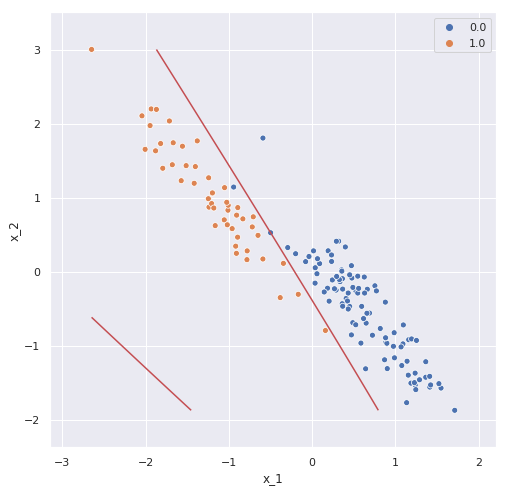

score entrainement :  0.9866666666666667
score test :  0.9793333333333333


In [74]:
# Compute the parameters
qua, lin, cst = qda(x_m, y_m)

# Display the score for the QDA
print("score entrainement : ", score_qda(x_m, y_m, qua, lin, cst))
print("score test : ", score_qda(x_m_test, y_m_test, qua, lin, cst))

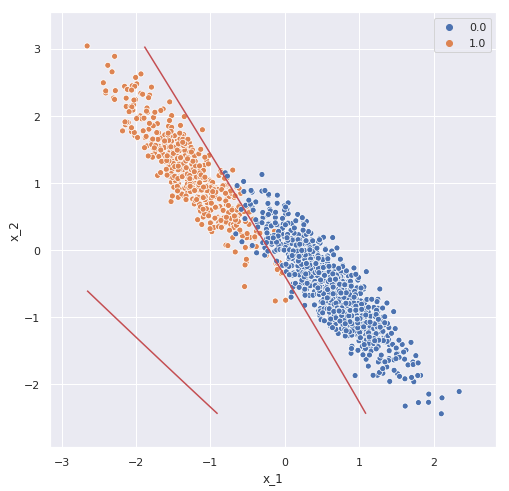

In [75]:
figure_qda(x_m_test, y_m_test, qua, lin, cst, saving_folder + "qda_test_" + dataset + ".eps");